### Jamboree Business Case Study

#### About:
Jamboree is a educational institute assists students in achieving top scores in standardized tests such as GMAT, GRE, and SAT. Recently, the institute has introduced a new feature that estimates the probability of admission into Ivy League colleges for Indian students. Ivy League colleges are a group of eight prestigious private research universities in the Northeastern United States, known for their academic excellence and strong reputations.

#### Objective:
The objective of this case study is to conduct an Exploratory Data Analysis (EDA) and build a predictive model using Linear Regression to understand the key factors influencing graduate admissions. The analysis aims to provide actionable insights to the institute, offering recommendations on how they can leverage this information to enhance their services and better assist students in achieving their academic goals.

#### Column Profiling:

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)


#### Problem Statment: 
Train a linear regression model to predict the probability of graduate admission into an Ivy League university based on the provided features.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Jamboree.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.shape

(500, 9)

In [4]:
df.dtypes.T

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
df.drop(columns= ["Serial No."],inplace=True)

In [6]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


#### From the above column analysis
   - **Categorical Columns** : 'University Rating', 'SOP', 'LOR ', 'Research'
   - **Numerical Columns** : 'GRE Score', 'TOEFL Score', 'CGPA'
   - **Target Column** : 'Chance of Admit '

### Univariate Analysis

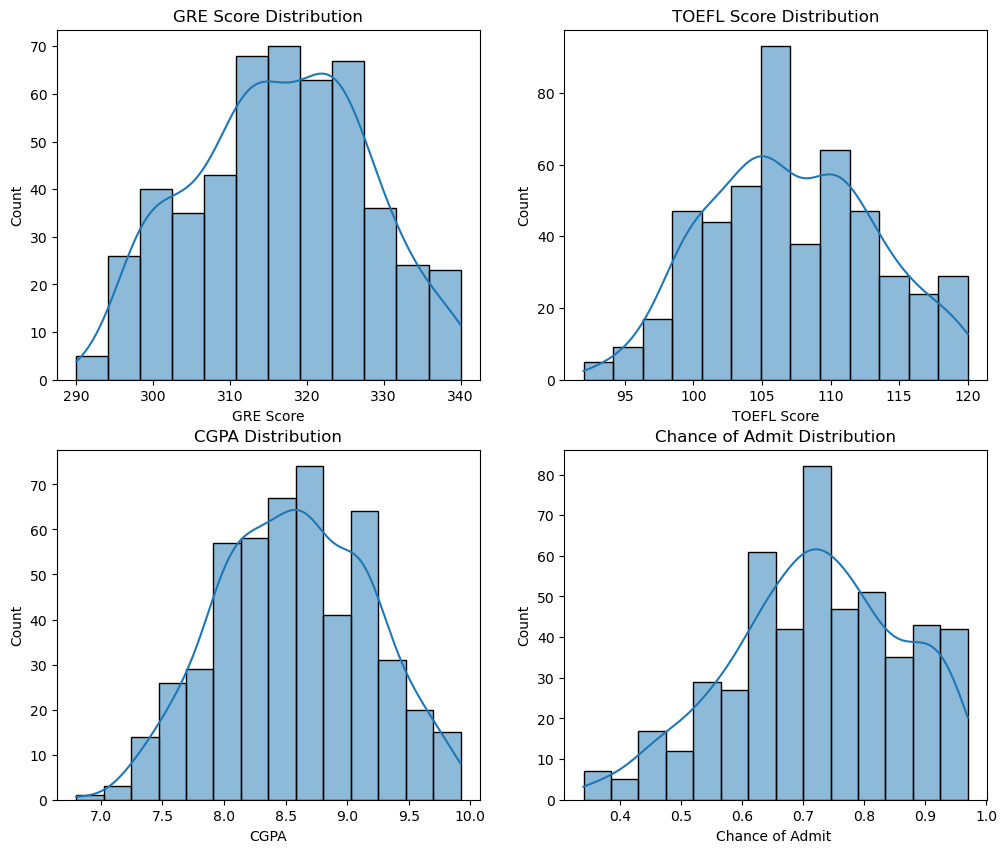

In [8]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.histplot(data=df,x="GRE Score",kde=True)
plt.title("GRE Score Distribution")

plt.subplot(2,2,2)
sns.histplot(data=df,x="TOEFL Score",kde=True)
plt.title("TOEFL Score Distribution")

plt.subplot(2,2,3)
sns.histplot(data=df,x="CGPA",kde=True)
plt.title("CGPA Distribution")

plt.subplot(2,2,4)
sns.histplot(data=df,x="Chance of Admit ",kde=True)
plt.title("Chance of Admit Distribution")

plt.show()

In [9]:
df[['University Rating', 'SOP', 'LOR ', 'Research']].nunique()

University Rating    5
SOP                  9
LOR                  9
Research             2
dtype: int64

In [10]:
df[['University Rating', 'SOP', 'LOR ', 'Research']].apply(lambda x: x.unique())

University Rating                                  [4, 3, 2, 5, 1]
SOP                  [4.5, 4.0, 3.0, 3.5, 2.0, 5.0, 1.5, 1.0, 2.5]
LOR                  [4.5, 3.5, 2.5, 3.0, 4.0, 1.5, 2.0, 5.0, 1.0]
Research                                                    [1, 0]
dtype: object

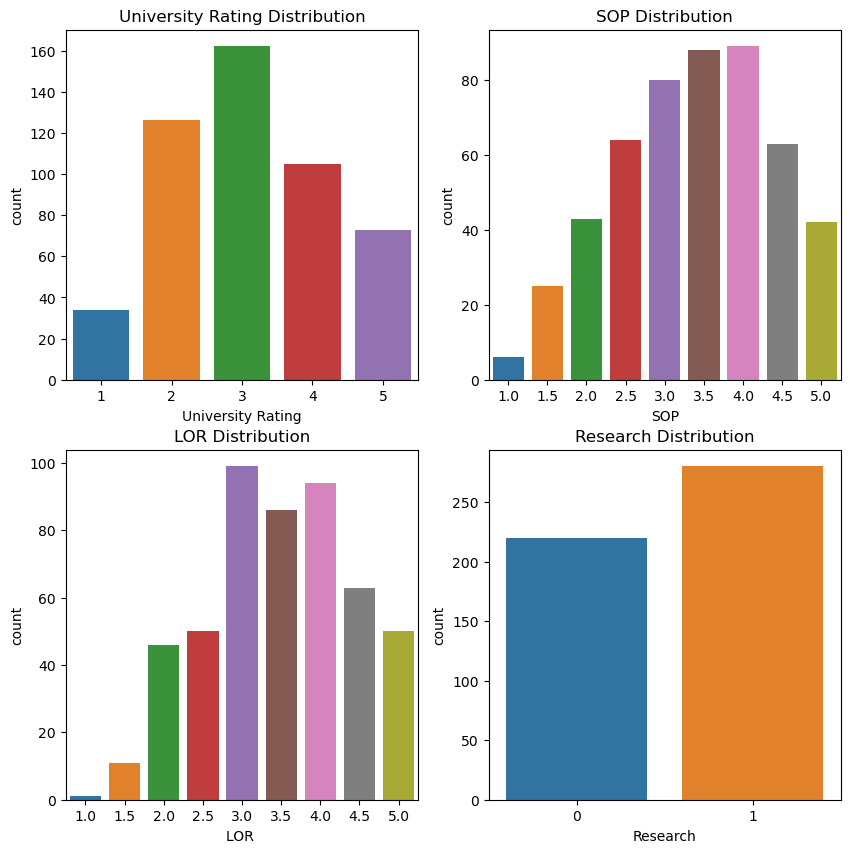

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.countplot(data=df, x= "University Rating")
plt.title("University Rating Distribution")

plt.subplot(2,2,2)
sns.countplot(data=df, x= "SOP")
plt.title("SOP Distribution")

plt.subplot(2,2,3)
sns.countplot(data=df, x= "LOR ")
plt.title("LOR Distribution")

plt.subplot(2,2,4)
sns.countplot(data=df, x= "Research")
plt.title("Research Distribution")

plt.show()


### Bivariate Analysis

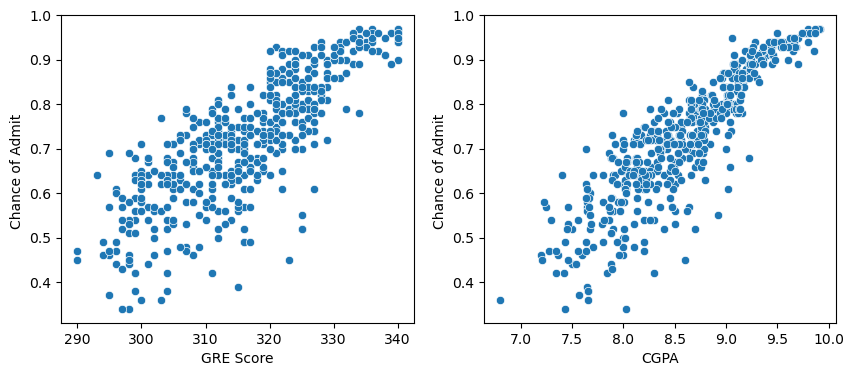

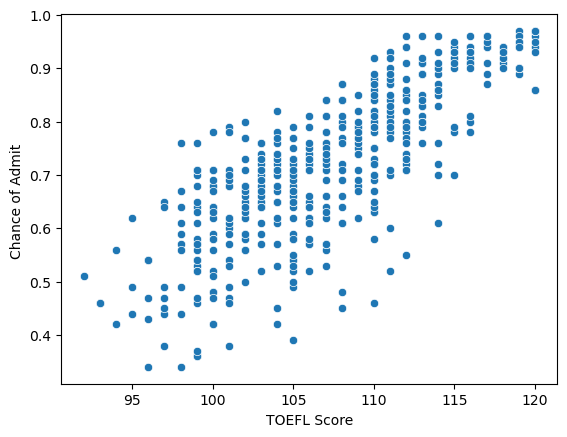

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.scatterplot(data=df, x = "GRE Score", y="Chance of Admit ", ax=axs[0])
sns.scatterplot(data=df, x = "CGPA", y="Chance of Admit ", ax=axs[1])
plt.show()
sns.scatterplot(data=df, x = "TOEFL Score", y="Chance of Admit ")
plt.show()

#### Observation
   There is a linear relationship between GRE Score, CGPA, TOEFL Score with Chance of Admit (Target Variables)

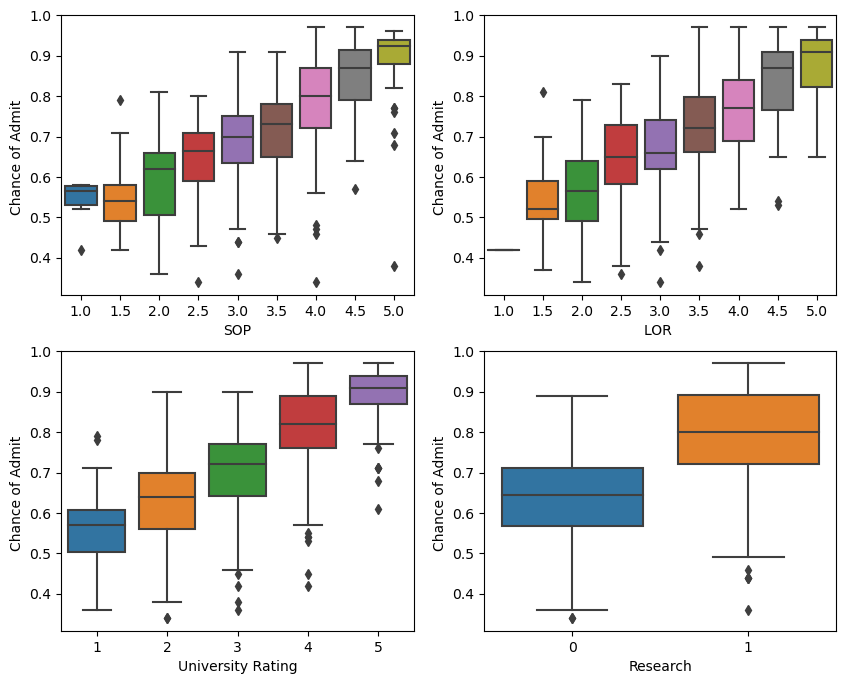

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))

sns.boxplot(data=df, x= 'SOP', y= 'Chance of Admit ', ax=axs[0,0])
sns.boxplot(data=df, x= 'LOR ', y= 'Chance of Admit ', ax=axs[0,1])
sns.boxplot(data=df, x= 'University Rating', y= 'Chance of Admit ', ax=axs[1,0])
sns.boxplot(data=df, x= 'Research', y= 'Chance of Admit ', ax=axs[1,1])
plt.show()


#### Observation
  -  As the Ratings of SOP, LOR and University Increases the chance of getting the admission also increases
  -  If the graduate is a research student he or she had higher chance of getting the admission

### Multivariate Analysis

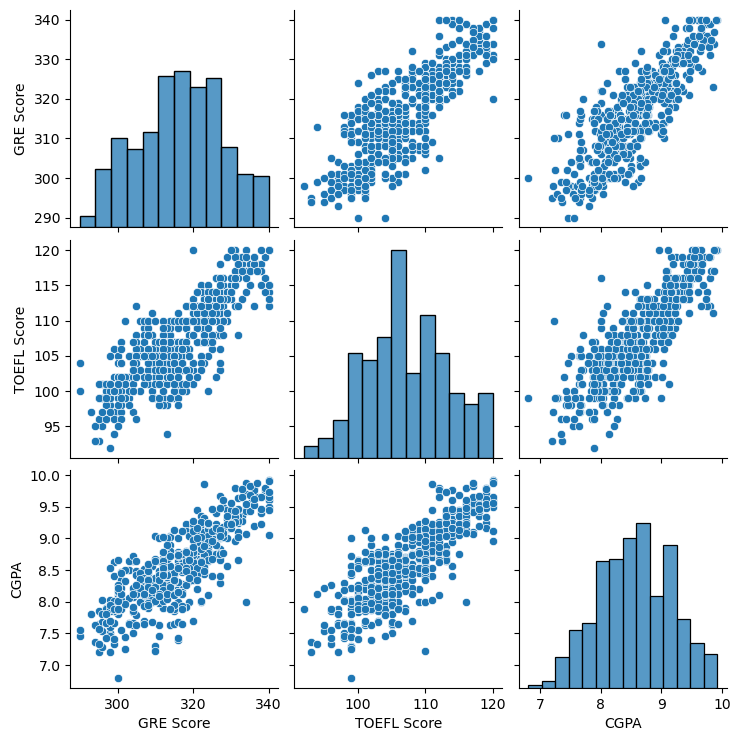

In [14]:
sns.pairplot(df[['GRE Score', 'TOEFL Score', 'CGPA']])
plt.show()

<Axes: >

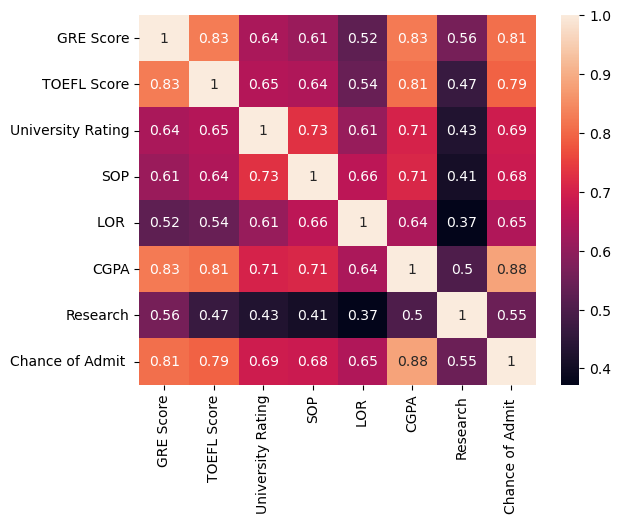

In [15]:
sns.heatmap(df.corr(),annot = True)

#### Observation:
  
       - There exist a linear relationship between the continous variables 
       - There is no correlation between two variables greater than >0.90 so no need to drop any columns

### Data Preprocessing

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [18]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

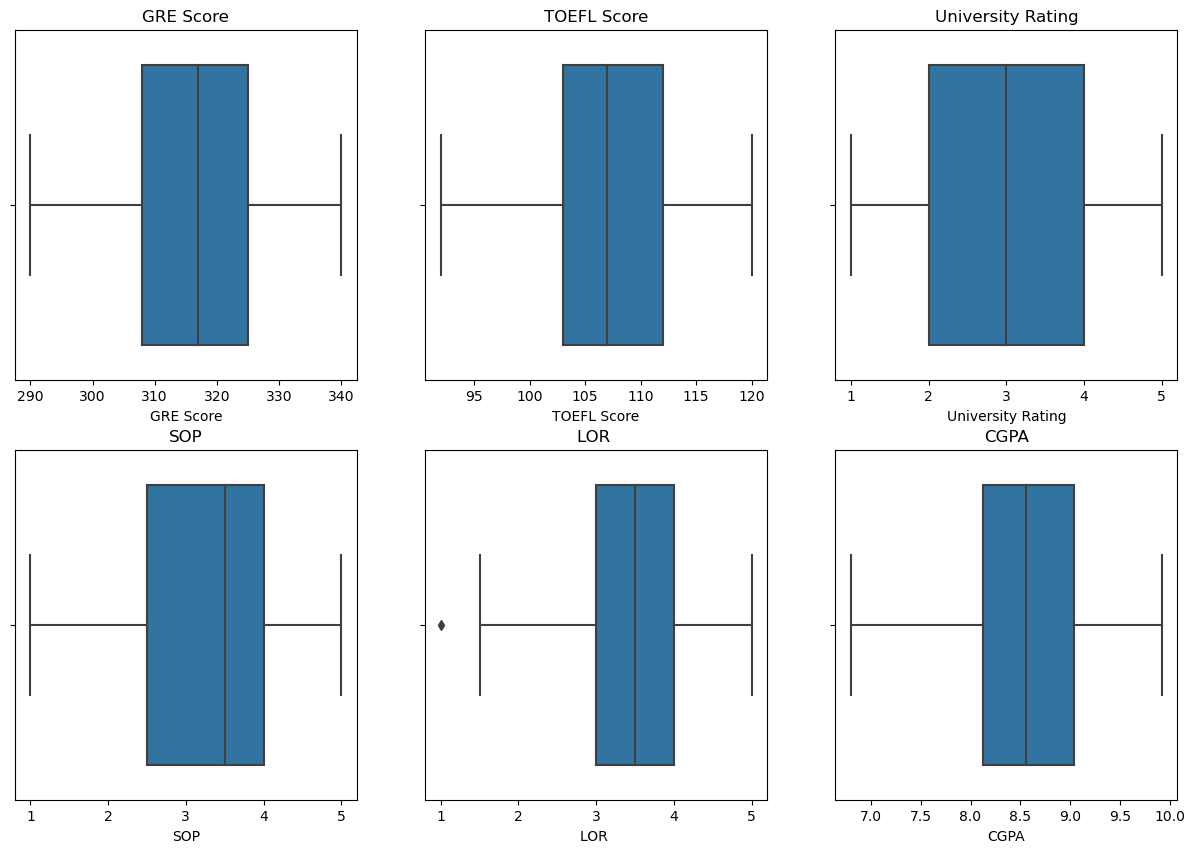

In [19]:
col = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']

plt.figure(figsize=(15,10))

for i in range (1,len(col)+1):
    
    plt.subplot(2,3,i)
    sns.boxplot(data=df,x=col[i-1])
    plt.title(col[i-1])


From the above box plot we can see LOR has one outlier we will handle it with IQR

#### Outlier Handling

In [20]:
lower_bound = df['LOR '].quantile(0.05)  # 5th percentile
upper_bound = df['LOR '].quantile(0.95)  # 95th percentile
df['LOR '] = df['LOR '].clip(lower=lower_bound, upper=upper_bound)

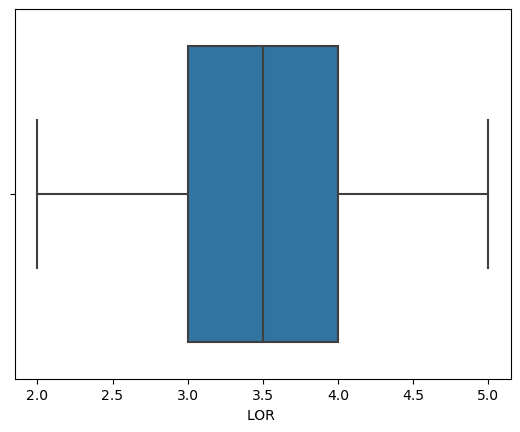

In [21]:
sns.boxplot(data=df,x = 'LOR ')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler

X = df.drop(columns="Chance of Admit ")
y = df['Chance of Admit ']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
428,316,103,2,2.0,4.5,8.74,0
490,307,105,2,2.5,4.5,8.12,1
53,324,112,4,4.0,2.5,8.10,1
336,319,110,3,3.0,2.5,8.79,0
154,326,108,3,3.0,3.5,8.89,0
...,...,...,...,...,...,...,...
22,328,116,5,5.0,5.0,9.50,1
72,321,111,5,5.0,5.0,9.45,1
493,300,95,2,3.0,2.0,8.22,1
15,314,105,3,3.5,2.5,8.30,0


In [24]:
y_train

428    0.69
490    0.67
53     0.72
336    0.72
154    0.80
       ... 
22     0.94
72     0.93
493    0.62
15     0.54
168    0.64
Name: Chance of Admit , Length: 400, dtype: float64

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns,index=X_train.index)

In [26]:
X_train_constant = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train,X_train_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     271.7
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          4.34e-146
Time:                        15:23:36   Log-Likelihood:                 573.15
No. Observations:                 400   AIC:                            -1130.
Df Residuals:                     392   BIC:                            -1098.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7221      0.00

In [27]:
residuals = model.resid
residuals.mean()

-6.50868248186498e-16

In [28]:
### Since the feature SOP and University Rating is greater than 0.05 we will drop to test whether adjusted R2 score increases

In [29]:
X_train = X_train.drop(columns=['University Rating', 'SOP'])

In [30]:
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     379.5
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          3.73e-148
Time:                        15:23:37   Log-Likelihood:                 571.93
No. Observations:                 400   AIC:                            -1132.
Df Residuals:                     394   BIC:                            -1108.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.4025      0.109    -12.861      

In [31]:
residuals = model.resid
residuals.mean()

-3.5263458819656535e-16

### Test for assumptions of Linear Regression

#### 1. VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = pd.DataFrame(X_train_scaled,columns=X_train.columns)

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values,i) for i in range(X_t.shape[1])]
vif

,Features,VIF
0,GRE Score,4.220903
1,TOEFL Score,3.927591
2,LOR,1.674296
3,CGPA,4.439301
4,Research,1.461172


All the features VIF are less than 5 which indicated acceptable level of multicolinearity between the independent features

#### 2. Mean Residuals

In [33]:
residuals = model.resid
residuals.mean()

-3.5263458819656535e-16

Mean redsiduals is almost zero 

#### 3. Linear Relationship between independent and dependent variables

From the above EDA analysis we can clearly see a linear relationship between the features (independent variables) and target (dependent variables)

#### 4. Test of Homoscedasticity

In [34]:
y_pred = model.predict(X_train_constant)

residual = y_pred - y_train

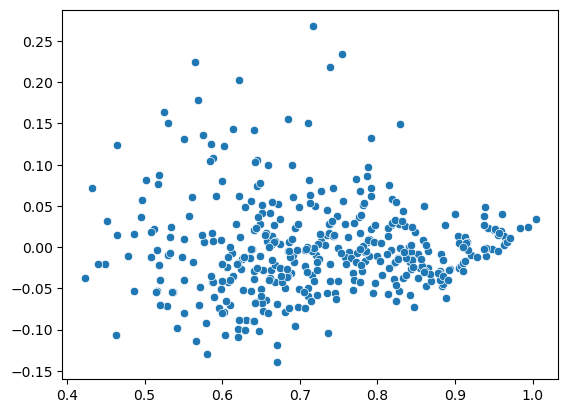

In [35]:
sns.scatterplot(x=y_pred,y=residual)
plt.show()

In [36]:
import statsmodels.stats.api as sm

val = sm.het_goldfeldquandt(y_train,X_train_constant)
print(f"F-Static: {val[0]} \np-val: {val[1]}")

F-Static: 1.0690653238381351 
p-val: 0.3211591725438705


In [37]:
if val[1]<0.05:
    print("Its is not Homoscedasticity --> Heteroscedasticity")
else:
    print("It is Homoscedasticity")

It is Homoscedasticity


#### 5. Normality of Residuals

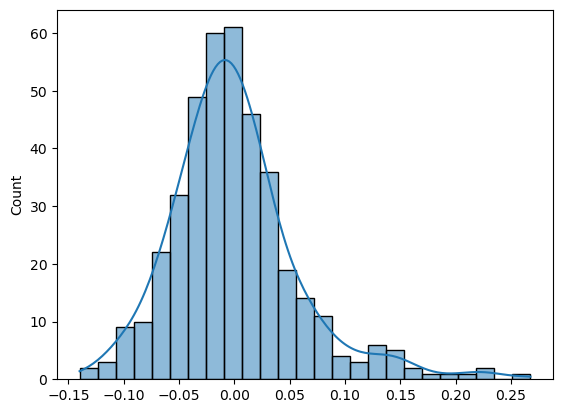

In [38]:
sns.histplot(residual,kde=True)
plt.show()

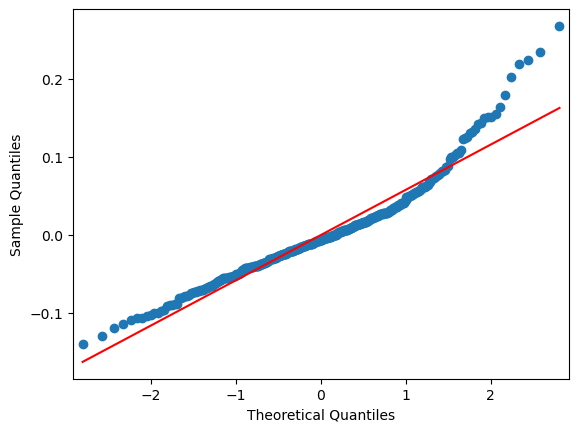

In [39]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residual,line='s')
plt.show()

In [40]:
from scipy.stats import shapiro
test,pval = shapiro(residual)
test,pval

(0.9368343949317932, 5.401080190731156e-12)

In [41]:
if pval<0.05:
    print("Residual is not Gaussian")
else:
    print("Residual is Gaussian")

Residual is not Gaussian


In [42]:
from scipy.stats import kstest
# For a normal distribution comparison
stat, p_value = kstest(residual, 'norm')
print(stat, p_value)

0.4475277562709869 1.3767551348954968e-73


In [43]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(residual))
print("Kurtosis:", kurtosis(residual))

Skewness: 1.1166565008415086
Kurtosis: 2.760559795002564


In [44]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
model = linear.fit(X_train_scaled,y_train)
model.coef_, model.intercept_

(array([0.02328798, 0.01806373, 0.00571072, 0.00216955, 0.01666216,
        0.06741957, 0.01225155]),
 0.722125)

In [45]:
X_test_scaled = scaler.fit_transform(X_test)
y_pred = model.predict(X_test_scaled)

#### Models Performance

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

n = len(y_test)  
p = X_train_scaled.shape[1]  

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared (Adjusted R²):", adjusted_r2)


Mean Absolute Error (MAE): 0.04704107640472839
Root Mean Squared Error (RMSE): 0.06610949488984925
R-squared (R²): 0.7955047026762634
Adjusted R-squared (Adjusted R²): 0.7799452778798921


In [47]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.001)  
ridge = Ridge(alpha=0.1)  


lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)
adjusted_r2_lasso = 1 - (1 - r2_lasso) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)
adjusted_r2_ridge = 1 - (1 - r2_ridge) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

print("*"*50)
print("Lasso Regression Performance Metrics")
print("*"*50)
print(f"MAE: {mae_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R²: {r2_lasso}")
print(f"Adjusted R²: {adjusted_r2_lasso}\n")
print("*"*50)
print("Ridge Regression Performance Metrics:")
print("*"*50)
print(f"MAE: {mae_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R²: {r2_ridge}")
print(f"Adjusted R²: {adjusted_r2_ridge}")
print("*"*50)


**************************************************
Lasso Regression Performance Metrics
**************************************************
MAE: 0.04704676975113681
RMSE: 0.06610567226204898
R²: 0.7955283509225437
Adjusted R²: 0.7799707254492589

**************************************************
Ridge Regression Performance Metrics:
**************************************************
MAE: 0.04704195586916882
RMSE: 0.06611260863195394
R²: 0.7954854388590512
Adjusted R²: 0.7799245483374573
**************************************************


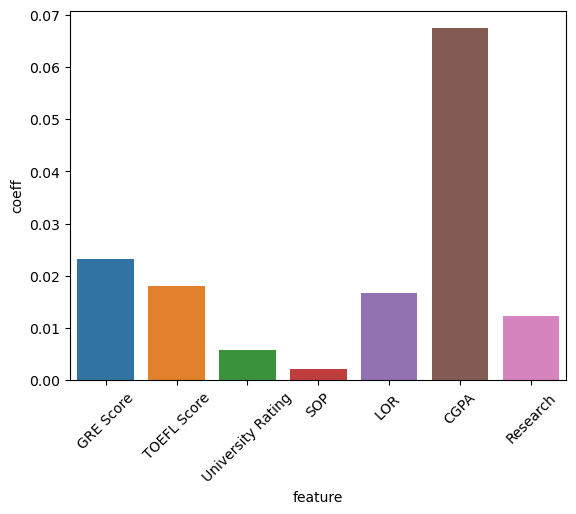

In [48]:
imp=pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),columns=['feature','coeff'])
sns.barplot(x='feature',y='coeff',data=imp)
plt.xticks(rotation=45)
plt.show()

### Recommendation and Overall Observation

 - CGPA is most important feature among all as the weight of the feature is higher compared to rest of other features
 - GRE score, TOEFL score and CGPA has a strong correlation with chance of addmission 
 - Statement of Purpose and Letter of Recommendation Strength increases then the chances of admition aslo increases.

 - Higher the university rating , increase the chance of getting admission

- For research student has higher chance of getting the admission
 - R² score and Adjusted R² scores are good which means the model performs well and we can rely on models prediction of Chance of admission